In [1]:
import numpy as np
import tensorflow as tf

In [4]:
npz = np.load('audibooks_data_train.npz')
traininputs, traintargets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('audibooks_data_validation.npz')
validationinputs, validationtargets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('audibooks_data_test.npz')
testinputs, testtargets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [8]:
inputsize = 10
outputsize = 2
hiddenlayersize = 50

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hiddenlayersize, activation = 'relu'), 
                            tf.keras.layers.Dense(hiddenlayersize, activation = 'relu'), 
                            tf.keras.layers.Dense(outputsize, activation = 'softmax') 
                            ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

nepochs = 100
nbatches = 100

#early stopping to stop the epochs when the quality considered worsened

earlystopping = tf.keras.callbacks.EarlyStopping(patience = 3)
#patience determine how many validation loss we can tolerate

model.fit(traininputs,traintargets,
          batch_size=nbatches,
          epochs=nepochs,
          callbacks=[earlystopping],
          validation_data=(validationinputs,validationtargets),
          verbose=2)

Epoch 1/100
36/36 - 1s - loss: 0.5660 - accuracy: 0.7748 - val_loss: 0.4184 - val_accuracy: 0.8680
Epoch 2/100
36/36 - 0s - loss: 0.3705 - accuracy: 0.8748 - val_loss: 0.2941 - val_accuracy: 0.8971
Epoch 3/100
36/36 - 0s - loss: 0.3163 - accuracy: 0.8871 - val_loss: 0.2712 - val_accuracy: 0.8971
Epoch 4/100
36/36 - 0s - loss: 0.2992 - accuracy: 0.8882 - val_loss: 0.2631 - val_accuracy: 0.8971
Epoch 5/100
36/36 - 0s - loss: 0.2858 - accuracy: 0.8952 - val_loss: 0.2588 - val_accuracy: 0.9038
Epoch 6/100
36/36 - 0s - loss: 0.2781 - accuracy: 0.8980 - val_loss: 0.2535 - val_accuracy: 0.9038
Epoch 7/100
36/36 - 0s - loss: 0.2694 - accuracy: 0.8983 - val_loss: 0.2523 - val_accuracy: 0.8949
Epoch 8/100
36/36 - 0s - loss: 0.2621 - accuracy: 0.9022 - val_loss: 0.2462 - val_accuracy: 0.9016
Epoch 9/100
36/36 - 0s - loss: 0.2594 - accuracy: 0.9022 - val_loss: 0.2465 - val_accuracy: 0.8993
Epoch 10/100
36/36 - 0s - loss: 0.2541 - accuracy: 0.9025 - val_loss: 0.2436 - val_accuracy: 0.9016
Epoch 11/

In [11]:
test_loss, test_accuracy = model.evaluate(testinputs,testtargets)

14/14 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9085


c:\users\rifqi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

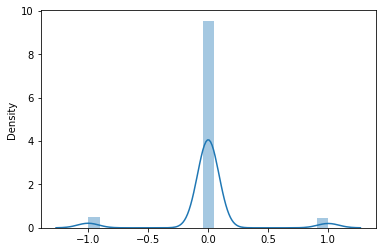

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

#manual evaluation
predictedtargets = model.predict(testinputs)
outputspredicted = []

for i in range(predictedtargets.shape[0]):
        if predictedtargets[i,0]>predictedtargets[i,1]:
            outputspredicted.append(0)
        elif predictedtargets[i,0]<predictedtargets[i,1]:
            outputspredicted.append(1)
            
ooooo = np.array(outputspredicted)
sns.distplot(ooooo-testtargets)